In this project 

Define exploratory data analysis with an overview of the whole project

Import libraries and exploring the dataset

Check missing values and outliers

Create visual methods to analyze the data

Analyze trends, patterns, and relationships in the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance-data.csv to insurance-data.csv


In [3]:
ins_data = pd.read_csv("insurance-data.csv")
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
ins_data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


The output count of each columns are same hence no null values present

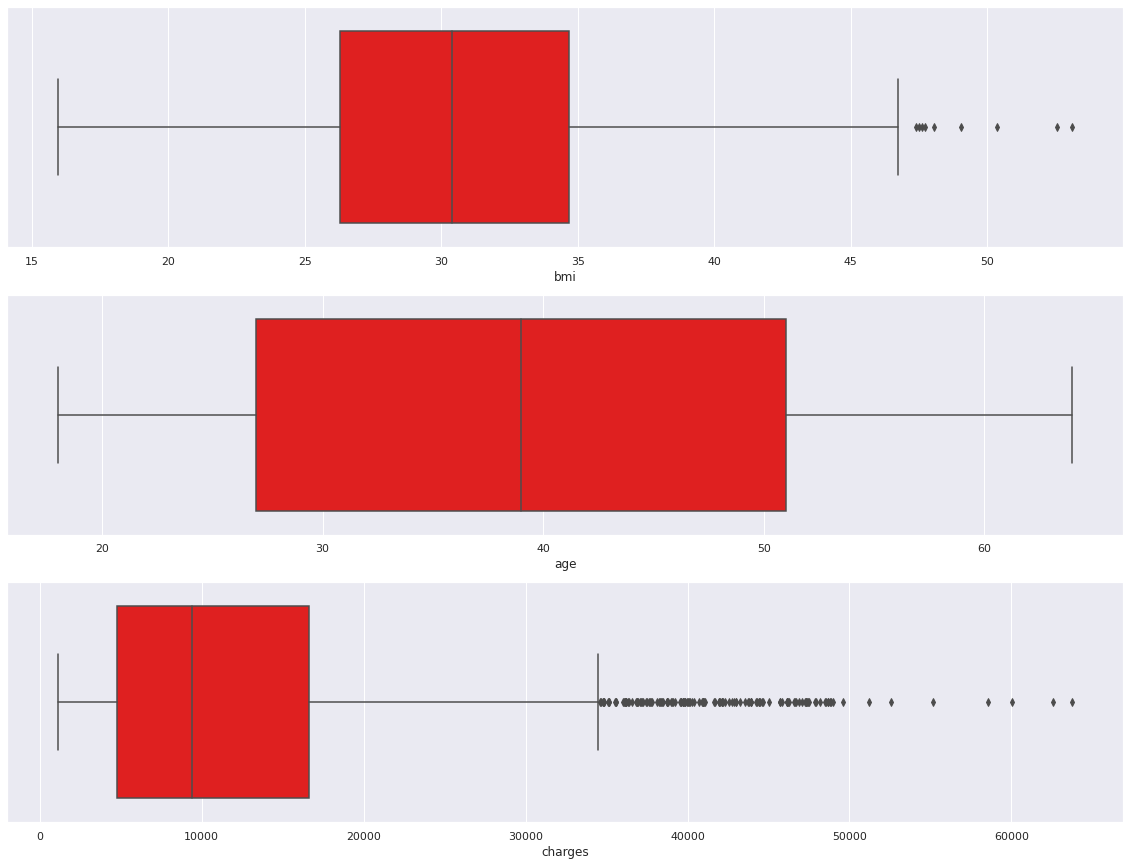

In [6]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= ins_data.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x=ins_data.age, color='red')

plt.subplot(3,1,3)
sns.boxplot(x=ins_data.charges, color='red')

In [ ]:
ins_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


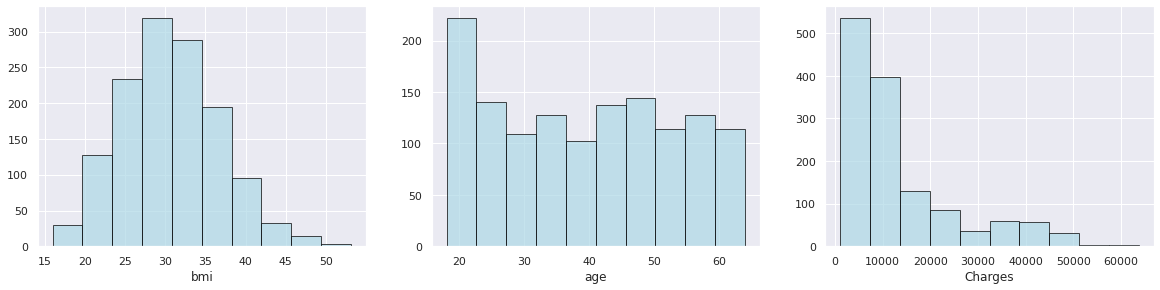

In [7]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(ins_data.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(ins_data.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(ins_data.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Charges')

### Write the code to show age and charges graphs, same as we did for bmi

plt.show()

In [8]:
# showing the skewness of variables
Skewness =  pd.DataFrame({'Skewness' : [stats.skew(ins_data.bmi),stats.skew(ins_data.age),stats.skew(ins_data.charges)]},
                         index = ['bmi','age','charges'])

# We Will Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


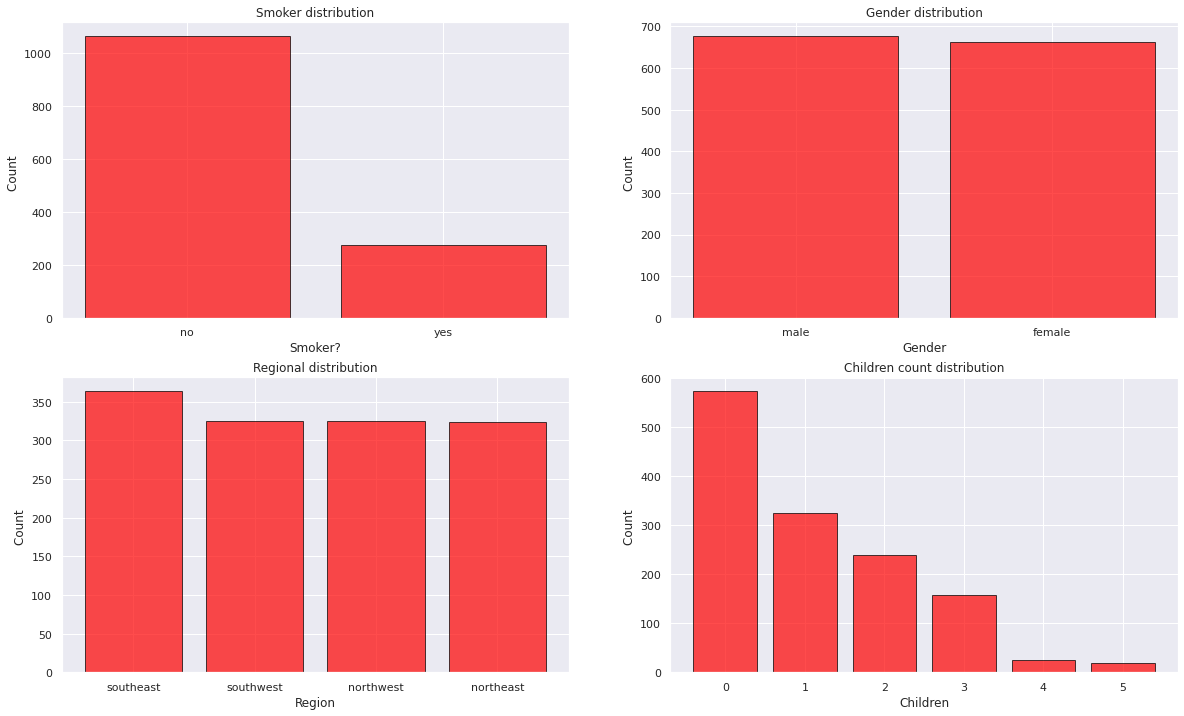

In [9]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = ins_data.smoker.value_counts().index    #Values for x-axis
y = [ins_data['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = ins_data.sex.value_counts().index    #Values for x-axis
y1 = [ins_data['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

### Your code here, write the code for Gender plot

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')

x2 = ins_data.region.value_counts().index    #Values for x-axis
y2 = [ins_data['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

### Your code here, write the code for Region plot

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Regional distribution')


x3 = ins_data.children.value_counts().index    #Values for x-axis
y3 = [ins_data['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

### Your code here, write the code for Children plot
plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  # plot a bar chart
plt.xlabel('Children')
plt.ylabel('Count ')
plt.title('Children count distribution')

plt.show()

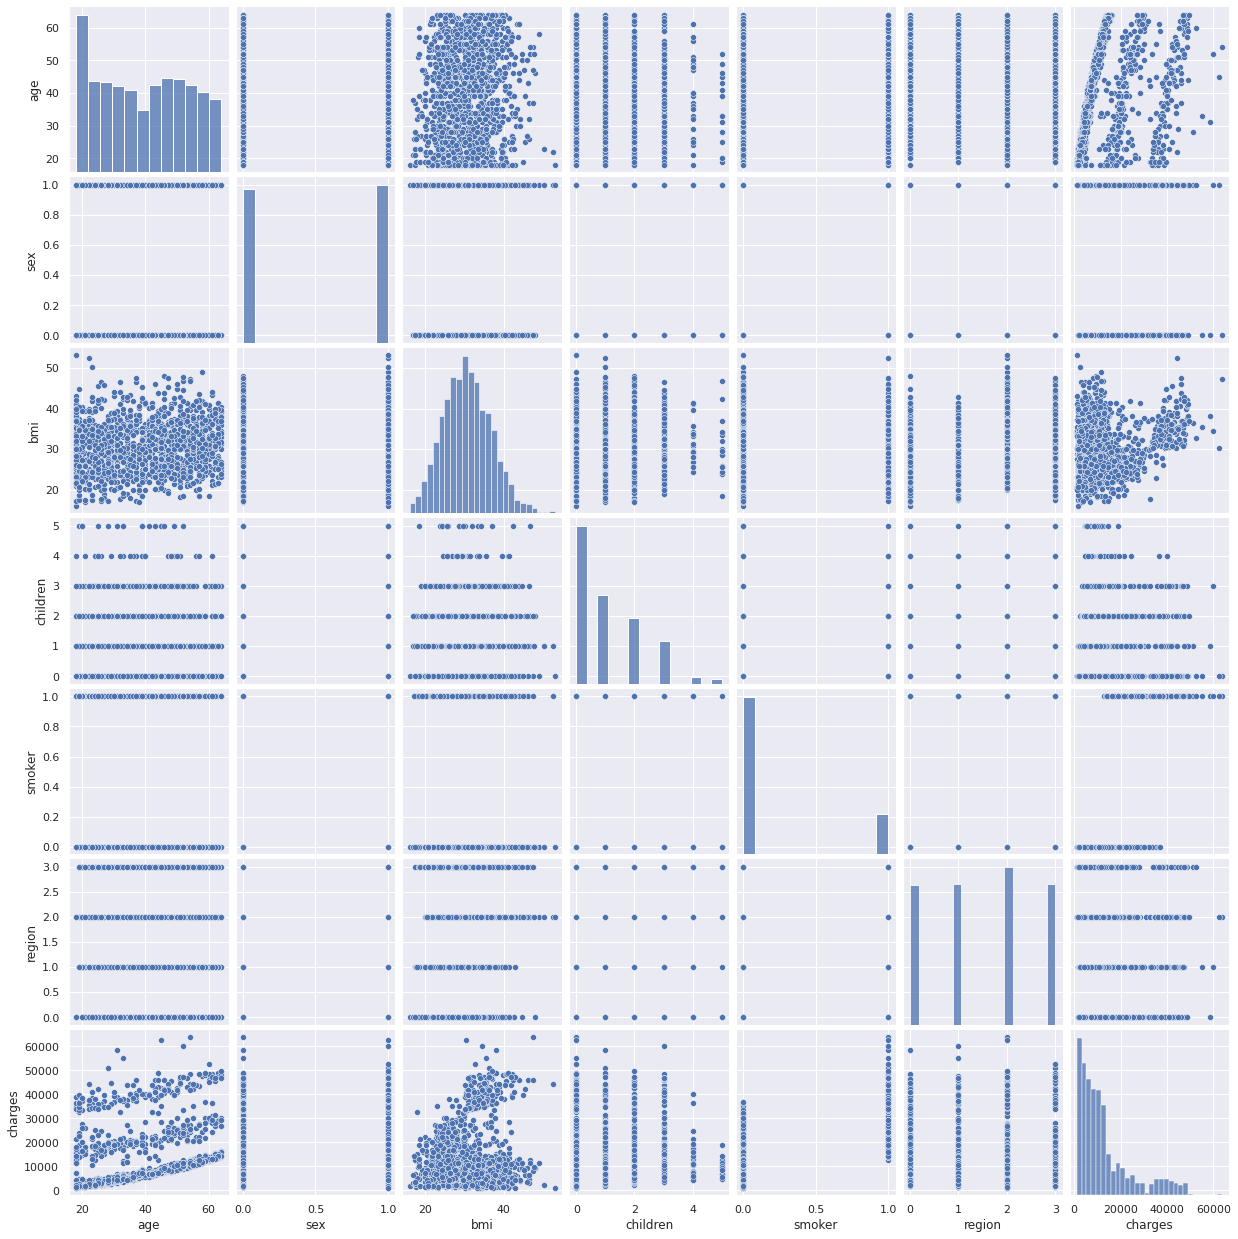

In [ ]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(ins_data)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

In [11]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
ins_data.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


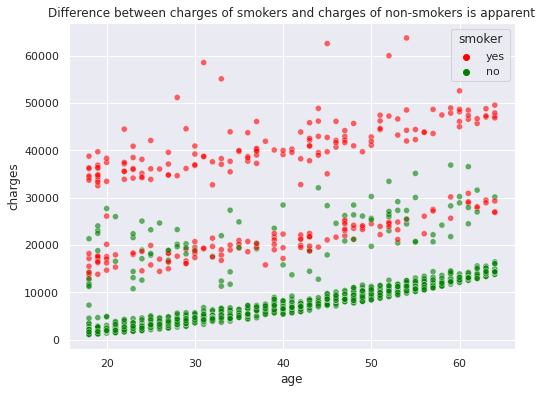

In [13]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(ins_data.age, ins_data.charges,hue=ins_data.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


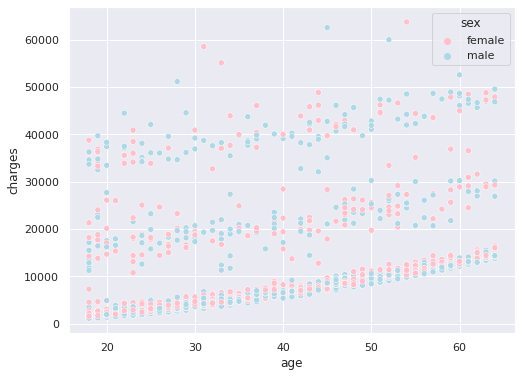

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(ins_data.age, ins_data.charges,hue=ins_data.sex,palette= ['pink','lightblue'] )

In [21]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(ins_data[ins_data.smoker == 'yes'].charges.tolist())### Your Code Here  # Selecting charges corresponding to smokers as an array
y = np.array(ins_data[ins_data.smoker == 'no'].charges.tolist())### Your Code Here # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05
